# KNN

Based on famous Iris dataset

I'm beginner, so I was using public solutions from Github, Kaggle, Google Developer and Udemy and I mixed them here for better understanding

- KNN will work for small dataset. It's simple to understand and implement.

- K-nearest neighbors can be used in classification or regression machine learning tasks. Classification involves placing input points into appropriate categories whereas regression involves establishing a relationship between input points and the rest of the data.

Some of the sources (great explanation for KNN) 
https://brilliant.org/wiki/k-nearest-neighbors/
https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/

In [21]:
import numpy as np #linear algebra
import pandas as pd #Very important part of Pandas is DataFrame. A DataFrame holds the type of data you might think of as a table. It's like sheet's Excel, or a table's SQL database.
import matplotlib.pyplot as plt #plots

In [23]:
#I have noticed that the first step (for many tutorials) was giving a names for the columns, so we should do it as well
# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

In [24]:
iris = pd.read_csv(r'C:/Users/tomek/Desktop/data/iris.data.csv', names=names) #data uploading

You can try uploading data by iris=datasets.load_iris() as well

Now we need to check if it works

In [25]:
iris.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
iris.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Let's try to understand what above data means. 

COUNT - shows how many rows have no missing values. 
MEAN is the medium. 

STD (STANDARD DEVIATION) shows numerically spread out the values (by using the Standard Deviation we have a "standard" way of knowing what is normal, and what is extra large or extra small). Cool explanation: https://www.mathsisfun.com/data/standard-deviation.html

MIN, MAX AND 25%, 50%, 75% shows the maximum and minimum value. It means that we are sorting the data from the minimum to maximum. 

When our dataset is ready we can start preparin it for KNN 

In [27]:
#split our dataset into attributes and labels or creating design matrix X and target vector y

In [28]:
X = iris.iloc[:, :-1].values  
y = iris.iloc[:, 4].values  

To avoid over-fitting, we will divide our dataset into training and test splits, which gives us a better idea as to how our algorithm performed during the testing phase. This way our algorithm is tested on un-seen data, as it would be in a production application.

In [29]:
from sklearn.model_selection import train_test_split

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) #0.20 means whole set has been divided in to two sets where test set is 20% of original set and train set in 80% of original test   

scale the features so that all of them can be uniformly evaluated - normalization

In [30]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler() #we need to define our model.   
scaler.fit(X_train) #capture patterns from provided data.

StandardScaler(copy=True, with_mean=True, with_std=True)

In [31]:
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

# Training and Predictions

In [32]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Let's try to understand what those data means.

Algorithm  - auto - value of ‘auto‘ leaves it to algorithm to make the best choice among the three

Leaf_size - the size of leaf in kd_tree or ball_tree. 

Metric - decides how distances are calculated in space. 'Minkowski' is regular data

N-Jobs - the number of parallel jobs to run for neighbors search. If -1, then the number of jobs is set to the number of CPU cores. Doesn’t affect fit method

N_neighbors - the number of neighbors that will vote for the class of the target point; default number is 5. 

p - we have 2. It is the same as euclidean distance. If we receive 1 parameter Manhattan distance

Weights -for the ‘uniform‘ weight, each of the k neighbors has equal vote whatever its distance from the target point (all k neighbors are equal). If the weight is ‘distance‘ then voting weightage or importance varies by inverse of distance; those points who are nearest to the target point have greater influence than those who are farther away.

In [33]:
y_pred = classifier.predict(X_test)  

# Evaluating the Algorithm

In [34]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[ 5  0  0]
 [ 0 12  2]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       1.00      0.86      0.92        14
 Iris-virginica       0.85      1.00      0.92        11

    avg / total       0.94      0.93      0.93        30



The results show that our KNN algorithm was able to classify all the 30 records in the test set with 100% accuracy, which is excellent. Although the algorithm performed very well with this dataset, don't expect the same results with all applications. As noted earlier, KNN doesn't always perform as well with high-dimensionality or categorical features.

# Comparing Error Rate with the K Value

In [35]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0,0.5,'Mean Error')

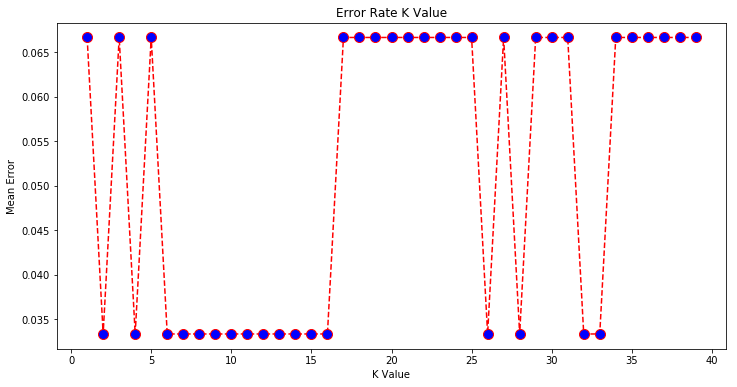

In [36]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  